In [11]:
from functions import *
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *

# Polarimetry Analysis

### - Load in calibration and fit arrays produced from LoadEPR and LoadNMR

In [12]:
newCalibrations=np.load('EPRArray/EPRCalibrationsV2.npy',allow_pickle=True)
fits=np.load('NMRDataFits/FitsInRange.npy')
settings=np.load('NMRDataSettings/SettingsInRange.npy')
indicesInRange,datesInRange = DatesInRange('20211214_150000','20221216_120200')

### - Create a Histogram of the raw, uncorrected calibrations to use as a baseline for the rest of the analysis

Text(0.5, 0, 'Bins (Calibration Values)')

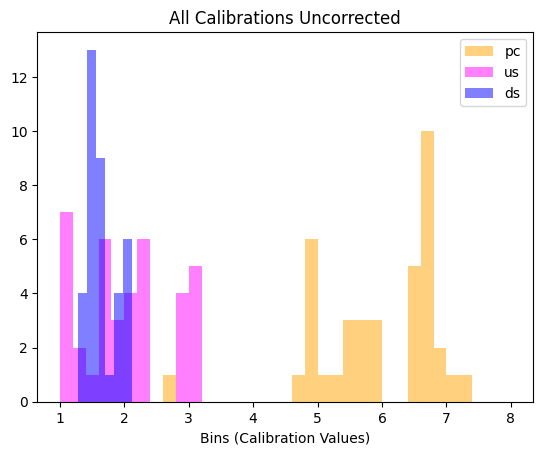

In [13]:
pc=np.empty(0)
us=np.empty(0)
ds=np.empty(0)

for i in range(0,len(newCalibrations)):
    pc=np.append(pc,newCalibrations[i][1]*.9)
    us=np.append(us,newCalibrations[i][2]*.9)
    ds=np.append(ds,newCalibrations[i][3]*.9)
    #pc=np.append(pc,newCalibrations[i][1])
    #us=np.append(us,newCalibrations[i][2])
    #ds=np.append(ds,newCalibrations[i][3])
    
#using the correct %/khz value for each cell
us=us*.6401/.6604
us[32:38]*=.6604/.6401
ds=ds*.6401/.6604
ds[32:38]*=.6604/.6401
pc=pc*.6401/.6604
pc[32:38]*=.6604/.6401
x=np.where(us!=0)
us=us[np.where(us!=0)]
ds=ds[np.where(ds!=0)]
pc=pc[np.where(pc!=0)]




u, i = np.unique(pc, return_index=True)
si = np.sort(i)
pc = pc[si]

u, i = np.unique(ds, return_index=True)
si = np.sort(i)
ds = ds[si]

u, i = np.unique(us, return_index=True)
si = np.sort(i)
us = us[si]

#newCalibrations=newCalibrations[x]
#newCalibrations=newCalibrations[si]
binN=35
x1,y,z=plt.hist(pc,range=(1,8),bins=binN,label='pc',alpha=.5,color='orange')
x2,y,z=plt.hist(us,range=(1,8),bins=binN,label='us',alpha=.5,color='magenta')
x3,y,z=plt.hist(ds,range=(1,8),bins=binN+15,label='ds',alpha=.5,color='blue')
plt.legend(loc='upper right')
plt.title('All Calibrations Uncorrected')
plt.xlabel('Bins (Calibration Values)')

DS, US, PC, std:  6.759 , 29.767 , 15.961


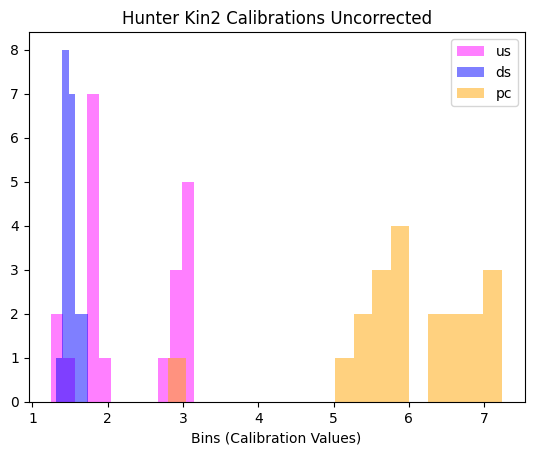

In [14]:
rounder=3
dsSig=np.round(np.std(ds[:20])/np.mean(ds[:20])*100,rounder)
usSig=np.round(np.std(us[:20])/np.mean(us[:20])*100,rounder)
pcSig=np.round(np.std(pc[:20])/np.mean(pc[:20])*100,rounder)

x1,y,z=plt.hist(us[:20],bins=12,color='magenta',alpha=.5,label='us')
x2,y,z=plt.hist(ds[:20],bins=5,color='blue',alpha=.5,label='ds')
x3,y,z=plt.hist(pc[:20],bins=18,color='orange',alpha=.5,label='pc')
plt.legend(loc='upper right')
plt.title('Hunter Kin2 Calibrations Uncorrected')
plt.xlabel('Bins (Calibration Values)')
print('DS, US, PC, std: ',dsSig,',',usSig,',',pcSig)

DS, US, PC, erro(%):  5.536 , 21.466 , 3.824


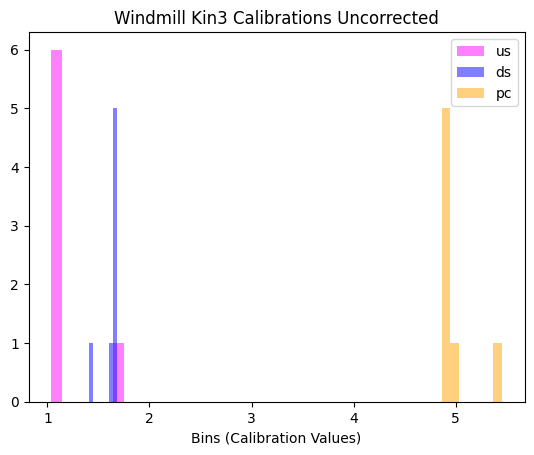

In [15]:
dsSig=np.round(np.std(ds[len(ds)-17:len(ds)-10]),3)
usSig=np.round(np.std(us[len(ds)-17:len(ds)-10]),3)
pcSig=np.round(np.std(pc[len(ds)-17:len(ds)-10]),3)
dsMean=np.mean(ds[len(ds)-17:len(ds)-10])
usMean=np.mean(us[len(ds)-17:len(ds)-10])
pcMean=np.mean(pc[len(ds)-17:len(ds)-10])
x1,y,z=plt.hist(us[len(ds)-17:len(ds)-10],bins=7,color='magenta',alpha=.5,label='us')
x2,y,z=plt.hist(ds[len(ds)-17:len(ds)-10],bins=7,color='blue',alpha=.5,label='ds')
x3,y,z=plt.hist(pc[len(ds)-17:len(ds)-10],bins=7,color='orange',alpha=.5,label='pc')
plt.legend(loc='upper right')
plt.title('Windmill Kin3 Calibrations Uncorrected')
plt.xlabel('Bins (Calibration Values)')
print('DS, US, PC, erro(%): ',np.round(dsSig/dsMean*100,3),',',np.round(usSig/usMean*100,3),',',np.round(pcSig/pcMean*100,3))

In [16]:
ds

array([1.30815349, 1.41876556, 1.44031223, 1.45365896, 1.69930848,
       1.63013232, 1.7449316 , 1.51385007, 1.44589518, 1.43734629,
       1.46543548, 1.61067925, 1.49047149, 1.5509243 , 1.54577753,
       1.54516689, 1.50093951, 1.53304144, 1.43132718, 1.39852739,
       1.41196135, 1.66725   , 1.665     , 1.66761   , 1.67391   ,
       1.68228   , 1.61268562, 1.92079432, 1.99799597, 1.92219006,
       2.01587883, 2.03917018, 2.07345294, 1.86487765, 2.02896386,
       2.03097023, 1.9431261 ])

In [17]:
ds[len(ds)-17:len(ds)-10]

array([1.41196135, 1.66725   , 1.665     , 1.66761   , 1.67391   ,
       1.68228   , 1.61268562])

In [8]:
us[len(ds)-17:]

array([1.74920604, 1.03896   , 1.05876   , 1.0476    , 1.04832   ,
       1.0368    , 1.04247   , 1.01443831, 2.09517408, 2.21590524,
       2.09744215, 2.24443059, 2.2343115 , 2.33506619, 2.01797244,
       2.23736468, 2.24818163, 2.11907606])

In [9]:
pc[-10:]

array([6.6784219 , 6.65809649, 6.72142801, 6.65582842, 6.62128396,
       6.67702616, 6.57635871, 6.57522467, 6.62224353, 6.49121882])

DS, US, PC, error(%):  3.19 , 4.2 , 0.95


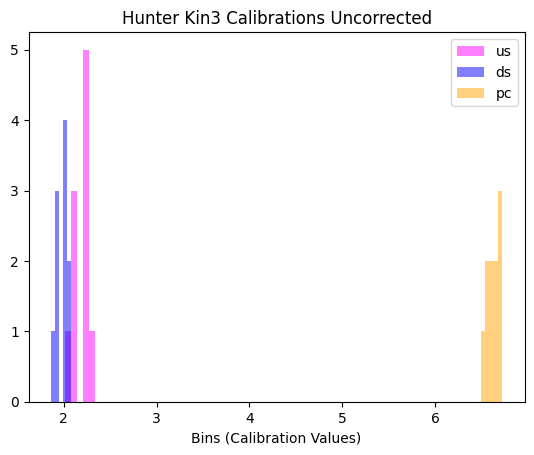

In [10]:
rounder=2
dsSig=np.round(100*np.std(ds[-10:])/np.mean(ds[-10:]),rounder)
usSig=np.round(100*np.std(us[-10:])/np.mean(us[-10:]),rounder)
pcSig=np.round(100*np.std(pc[-10:])/np.mean(pc[-10:]),rounder)

x1,y,z=plt.hist(us[-10:],bins=5,color='magenta',alpha=.5,label='us')
x2,y,z=plt.hist(ds[-10:],bins=5,color='blue',alpha=.5,label='ds')
x3,y,z=plt.hist(pc[-10:],bins=5,color='orange',alpha=.5,label='pc')
plt.legend(loc='upper right')
plt.title('Hunter Kin3 Calibrations Uncorrected')
plt.xlabel('Bins (Calibration Values)')
print('DS, US, PC, error(%): ',dsSig,',',usSig,',',pcSig)

# Finding Trends

## Hunter Kin2

DS, US, PC, std:  10.169 , 33.661 , 20.942


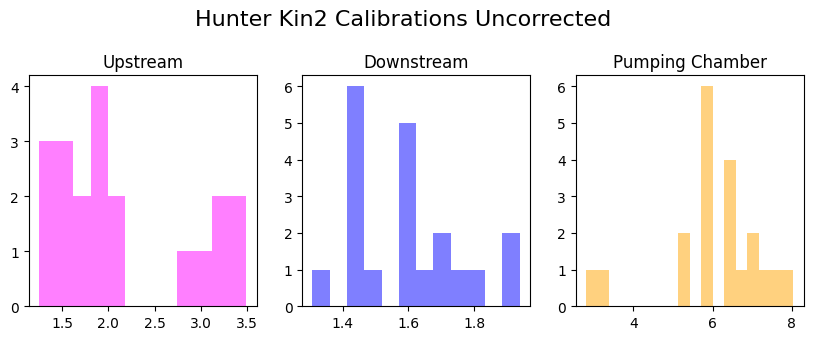

In [9]:
hunterKin2DS=ds[:20]
hunterKin2US=us[:20]
hunterKin2PC=pc[:20]
hunterKin2Calibrations=newCalibrations[:20]
rounder=3
dsSig=np.round(np.std(ds[:20])/np.mean(ds[:20])*100,rounder)
usSig=np.round(np.std(us[:20])/np.mean(us[:20])*100,rounder)
pcSig=np.round(np.std(pc[:20])/np.mean(pc[:20])*100,rounder)



# Create the subplots and the histograms
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax1.hist(us[:20],bins=12,color='magenta',alpha=.5,label='us')
ax2.hist(ds[:20],bins=12,color='blue',alpha=.5,label='ds')
ax3.hist(pc[:20],bins=18,color='orange',alpha=.5,label='pc')

# Set the titles for the histograms
plt.suptitle('Hunter Kin2 Calibrations Uncorrected', fontsize=16,y=1.10)

ax1.set_title("Upstream")
ax2.set_title("Downstream")
ax3.set_title("Pumping Chamber")
print('DS, US, PC, std: ',dsSig,',',usSig,',',pcSig)

In [10]:
hunterKin2US

array([1.24883471, 1.38759412, 1.39207211, 1.54674679, 1.4381314 ,
       1.59792377, 2.81223341, 3.12470379, 3.14337175, 3.49263528,
       3.11720171, 3.46355745, 1.92559217, 2.13954685, 1.86976273,
       2.07751414, 1.74205289, 1.93561432, 1.74222736, 1.93580818])

In [11]:
hunterKin2DS

array([1.30815349, 1.45350388, 1.41876556, 1.57640618, 1.44031223,
       1.60034693, 1.45365896, 1.61517662, 1.69930848, 1.88812053,
       1.63013232, 1.81125813, 1.7449316 , 1.93881289, 1.51385007,
       1.68205563, 1.44589518, 1.6065502 , 1.43734629, 1.59705144])

#### Group the data from upstream histogram

In [12]:
usGroup1=np.where(hunterKin2US<2.5)
usGroup2=np.where((hunterKin2US>2.5) )

usGroup1Cal=hunterKin2Calibrations[usGroup1]
usGroup2Cal=hunterKin2Calibrations[usGroup2]


# Adjust settings file to make it easy to compare and look at the settings in group 1 and 2


In [13]:
from datetime import datetime

In [14]:
#Order the fits and settings arrays chronologically

In [15]:
myFits=np.transpose(fits)
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
myFitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))

In [16]:
settings=np.load('NMRDataSettings/SettingsInRange.npy')
myFits=settings
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
mySettingsOrdered = np.transpose(np.take(myFits, index_array, axis=0))

In [17]:
#mySettingsOrdered[3]

In [18]:
#Get Settings for Group 1

In [19]:
usGroup1Cal[0][0]
DATES=np.empty(0)
beforeIndicesGroup1=np.empty(0)
afterIndices=np.empty(0)
niceSettingsDates=np.empty(0)
for n in range(0,len(myFitsOrdered[0])):
    DATES=np.append(DATES,myFitsOrdered[0][n].astype(int).astype(str)[:8]+'_'+myFitsOrdered[0][n].astype(int).astype(str)[8:])
for i in range(0,len(usGroup1Cal)):
    beforeIndicesGroup1=np.append(beforeIndicesGroup1,FindNMRsB4andAft('2022'+str(usGroup1Cal[i][0]),DATES)[0])
    
    
for i in range(0,len(mySettingsOrdered[0])):
    niceSettingsDates=np.append(niceSettingsDates,mySettingsOrdered[0][i].astype(int).astype(str)[:8]+'_'+mySettingsOrdered[0][i].astype(int).astype(str)[8:])

beforeIndicesGroup1=beforeIndicesGroup1.astype(int)



finalSettingsOrdered=np.transpose(mySettingsOrdered)
settingsGroup1=np.empty(0)
for i in range(0,len(beforeIndicesGroup1)):
    settingsGroup1=np.append(settingsGroup1,finalSettingsOrdered[np.where(niceSettingsDates==DATES[beforeIndicesGroup1[i]])[0][0]])
SettingsGroup1=np.reshape(settingsGroup1,(int(len(settingsGroup1)/8),8)) 

#SettingsGroup1

In [20]:
#Get Settings for Group 2

In [21]:
usGroup2Cal[0][0]
DATES=np.empty(0)
beforeIndicesGroup2=np.empty(0)
afterIndices=np.empty(0)
niceSettingsDates=np.empty(0)
for n in range(0,len(myFitsOrdered[0])):
    DATES=np.append(DATES,myFitsOrdered[0][n].astype(int).astype(str)[:8]+'_'+myFitsOrdered[0][n].astype(int).astype(str)[8:])
for i in range(0,len(usGroup2Cal)):
    beforeIndicesGroup2=np.append(beforeIndicesGroup2,FindNMRsB4andAft('2022'+str(usGroup2Cal[i][0]),DATES)[0])
    
    
for i in range(0,len(mySettingsOrdered[0])):
    niceSettingsDates=np.append(niceSettingsDates,mySettingsOrdered[0][i].astype(int).astype(str)[:8]+'_'+mySettingsOrdered[0][i].astype(int).astype(str)[8:])

beforeIndicesGroup2=beforeIndicesGroup2.astype(int)



finalSettingsOrdered=np.transpose(mySettingsOrdered)
settingsGroup2=np.empty(0)
for i in range(0,len(beforeIndicesGroup2)):
    settingsGroup2=np.append(settingsGroup2,finalSettingsOrdered[np.where(niceSettingsDates==DATES[beforeIndicesGroup2[i]])[0][0]])
SettingsGroup2=np.reshape(settingsGroup2,(int(len(settingsGroup2)/8),8)) 

#SettingsGroup2

In [22]:
#combine the two groups
usGroup1=np.empty(0)
adjusGroup2=np.empty(0)
dsGroup1=np.empty(0)
addsGroup2=np.empty(0)



In [23]:
#adjust group2 for ds and us
for i in range(0,len(usGroup2Cal)):
    adjusGroup2=np.append(adjusGroup2Cal,usGroup2Cal[i][2]*.48)
    addsGroup2=np.append(addsGroup2,usGroup2Cal[i][3]*.48)
    
for i in range(0,len(usGroup1Cal)):
    dsGroup1=np.append(dsGroup1,usGroup1Cal[i][3])
    usGroup1=np.append(usGroup1,usGroup1Cal[i][2])

NameError: name 'adjusGroup2Cal' is not defined

In [ ]:
adjustedUS=np.append(usGroup1,adjusGroup2)
adjustedDS=np.append(dsGroup1,addsGroup2)

In [24]:
adjustedDS

NameError: name 'adjustedDS' is not defined

# EUREKAAAAAAAAAAAAAAAAAAAA

In [25]:
noWay=np.empty(0)
group1=np.empty(0)
for i in range(0,len(usGroup1Cal)):
    group1=np.append(group1,usGroup1Cal[i][2])
for i in range(0,len(usGroup2Cal)):
    noWay=np.append(noWay,usGroup2Cal[i][2]*.48)

In [26]:
np.std(noWay)/np.mean(noWay)*100

70.8507722198792

(array([2., 4.]),
 array([0.      , 0.529776, 1.059552]),
 <BarContainer object of 2 artists>)

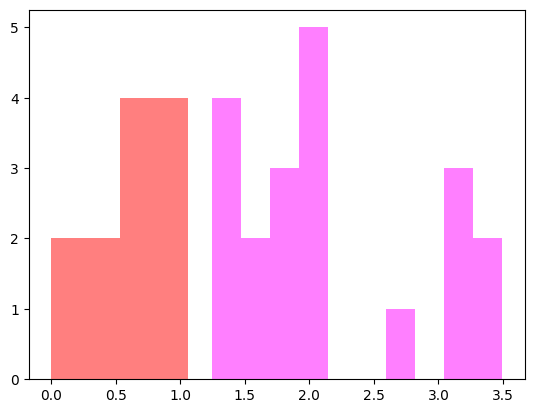

In [27]:
plt.hist(hunterKin2US,bins=10,alpha=.5,color='magenta')
plt.hist(noWay,bins=2,alpha=.5,color='red')

In [28]:
noWay

array([1.059552, 0.      , 0.      , 1.028832, 1.028832, 0.95856 ])

In [29]:
newUS=np.append(group1,noWay)

(array([4., 0., 4., 1., 2., 4., 0., 0., 1., 4.]),
 array([0.     , 0.36034, 0.72068, 1.08102, 1.44136, 1.8017 , 2.16204,
        2.52238, 2.88272, 3.24306, 3.6034 ]),
 <BarContainer object of 10 artists>)

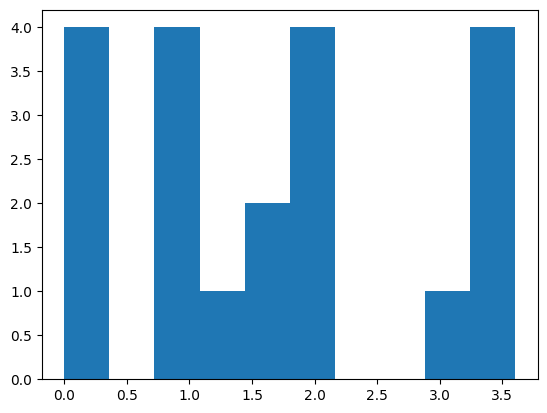

In [30]:
plt.hist(newUS)

In [31]:
print(np.mean(newUS),'+/-',((np.std(newUS)/np.mean(newUS))*100))

1.7183288 +/- 71.03426574226887


In [32]:
11020317

11020317

In [33]:
#usGroup2Cal

In [34]:
7.3545/6.7571

1.0884107087359962

In [35]:
257/249

1.0321285140562249

#### Target chamber temps in each group

In [36]:
#Group 1
g1tc=np.empty(0)
g1tt=np.empty(0)
g1us=np.empty(0)
for i in range(0,len(usGroup1Cal)):
    g1us=np.append(g1us,usGroup1Cal[i][2])
    g1tc=np.append(g1tc,np.round(np.mean(usGroup1Cal[i][4][:4]),3))
    g1tt=np.append(g1tt,np.round(usGroup1Cal[i][4][7]-usGroup1Cal[i][4][6],3))
    #print(np.round(np.mean(usGroup1Cal[i][4][:4]),3))


In [37]:
#Group 2
g2tc=np.empty(0)
g2tt=np.empty(0)
g2us=np.empty(0)
for i in range(0,len(usGroup2Cal)):
    g2us=np.append(g2us,usGroup2Cal[i][2])
    g2tc=np.append(g2tc,np.round(np.mean(usGroup2Cal[i][4][:4]),3))
    g2tt=np.append(g2tt,np.round(usGroup2Cal[i][4][7]-usGroup2Cal[i][4][6],3))

    #print(np.round(np.mean(usGroup2Cal[i][4][:4]),3))

In [38]:
#Group 3
g3tc=np.empty(0)
g3tt=np.empty(0)
g3us=np.empty(0)
for i in range(0,len(usGroup3Cal)):
    g3us=np.append(g3us,usGroup3Cal[i][2])
    g3tc=np.append(g3tc,np.round(np.mean(usGroup3Cal[i][4][:4]),3))
    g3tt=np.append(g3tt,np.round(usGroup3Cal[i][4][7]-usGroup3Cal[i][4][6],3))

    #print(np.round(np.mean(usGroup3Cal[i][4][:4]),3))


NameError: name 'usGroup3Cal' is not defined

In [39]:
# Look at error in each group

2.1636285714285717 1.4151999999999998 nan
54.06080545022141 70.85077221987922 nan


/home/research/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/research/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/research/.local/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/research/.local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/research/.local/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


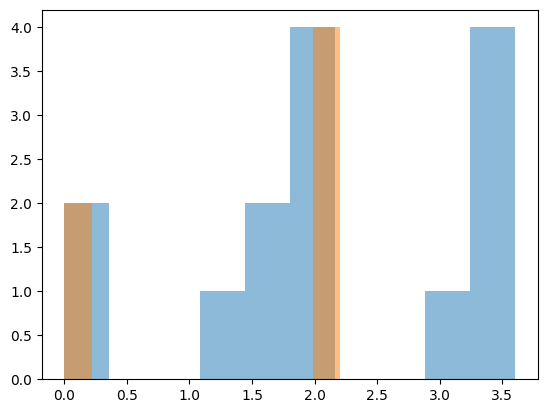

In [40]:
plt.hist(g1us,alpha=.5)
plt.hist(g2us,alpha=.5)
plt.hist(g3us,alpha=.5)
g1usM=np.mean(g1us)
g2usM=np.mean(g2us)
g3usM=np.mean(g3us)
print(g1usM,g2usM,g3usM)
print(100*np.std(g1us)/g1usM,100*np.std(g2us)/g2usM,100*np.std(g3us)/g3usM)

32.05235714285714 30.544833333333333 nan
4.324055877251338 1.5779088922438522 nan


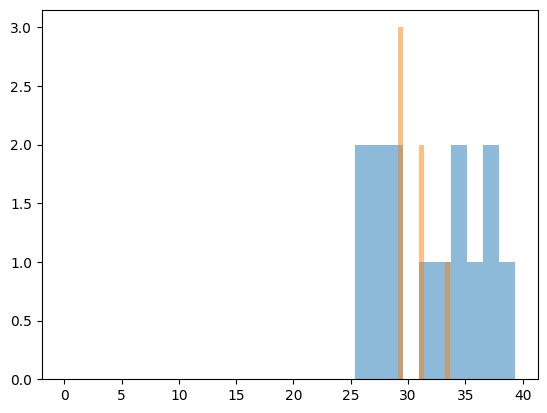

In [41]:
plt.hist(g1tc,alpha=.5)
plt.hist(g2tc,alpha=.5)
plt.hist(g3tc,alpha=.5)
g1tcM=np.mean(g1tc)
g2tcM=np.mean(g2tc)
g3tcM=np.mean(g3tc)
print(g1tcM,g2tcM,g3tcM)
print(np.std(g1tc),np.std(g2tc),np.std(g3tc))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

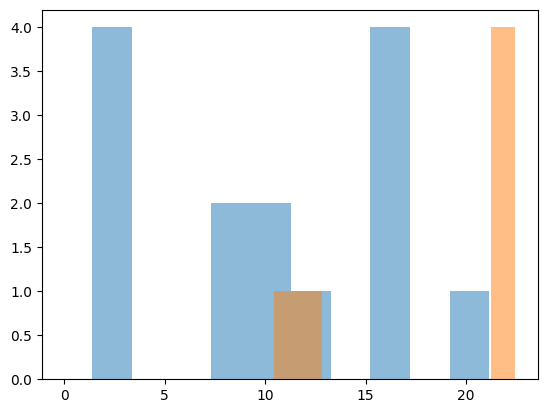

In [42]:
plt.hist(g1tt,alpha=.5)
plt.hist(g2tt,alpha=.5)
plt.hist(g3tt,alpha=.5)

#### Transfer tube temp diff in each group

## Windmill Kin3

DS, US, PC, std:  5.521 , 21.496 , 3.818


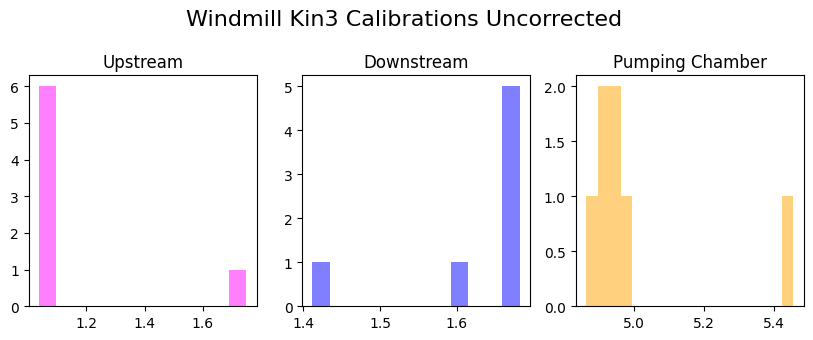

In [18]:
windmillDS=ds[20:27]
windmillUS=us[20:27]
windmillPC=pc[20:27]
windmillKin2Calibrations=newCalibrations[20:27]

rounder=3
dsSig=np.round(np.std(windmillDS)/np.mean(windmillDS)*100,rounder)
usSig=np.round(np.std(windmillUS)/np.mean(windmillUS)*100,rounder)
pcSig=np.round(np.std(windmillPC)/np.mean(windmillPC)*100,rounder)



# Create the subplots and the histograms
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax1.hist(windmillUS,bins=12,color='magenta',alpha=.5,label='us')
ax2.hist(windmillDS,bins=12,color='blue',alpha=.5,label='ds')
ax3.hist(windmillPC,bins=18,color='orange',alpha=.5,label='pc')

# Set the titles for the histograms
plt.suptitle('Windmill Kin3 Calibrations Uncorrected', fontsize=16,y=1.10)

ax1.set_title("Upstream")
ax2.set_title("Downstream")
ax3.set_title("Pumping Chamber")
print('DS, US, PC, std: ',dsSig,',',usSig,',',pcSig)

In [25]:
ExportWindmillCalibrations=ds[len(ds)-16:len(ds)-10]
ExportWindmillCalibrations

array([1.66725   , 1.665     , 1.66761   , 1.67391   , 1.68228   ,
       1.61268562])

In [30]:
CalWindmillKin3=np.mean(windmillDS[1:])
CalWindmillKin3/.9

1.846062151726227

## Hunter Kin3

DS, US, PC, std:  3.195 , 4.199 , 0.949


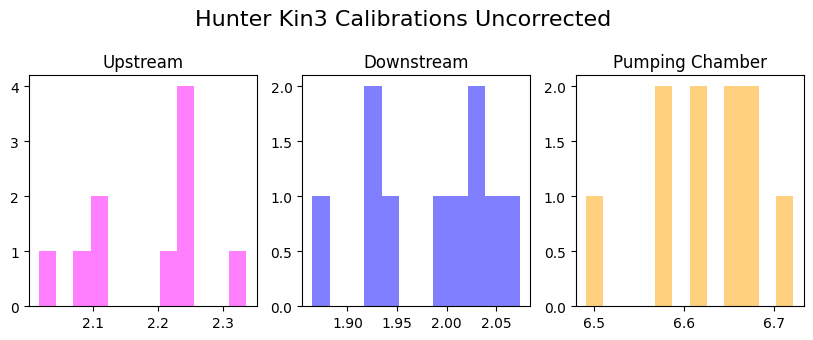

In [26]:
hunterKin3DS=ds[-10:]
hunterKin3US=us[-10:]
hunterKin3PC=pc[-10:]
hunterKin3Calibrations=newCalibrations[-10:]

rounder=3
dsSig=np.round(np.std(hunterKin3DS)/np.mean(hunterKin3DS)*100,rounder)
usSig=np.round(np.std(hunterKin3US)/np.mean(hunterKin3US)*100,rounder)
pcSig=np.round(np.std(hunterKin3PC)/np.mean(hunterKin3PC)*100,rounder)



# Create the subplots and the histograms
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax1.hist(hunterKin3US,bins=12,color='magenta',alpha=.5,label='us')
ax2.hist(hunterKin3DS,bins=12,color='blue',alpha=.5,label='ds')
ax3.hist(hunterKin3PC,bins=12,color='orange',alpha=.5,label='pc')

# Set the titles for the histograms
plt.suptitle('Hunter Kin3 Calibrations Uncorrected', fontsize=16,y=1.10)

ax1.set_title("Upstream")
ax2.set_title("Downstream")
ax3.set_title("Pumping Chamber")
print('DS, US, PC, std: ',dsSig,',',usSig,',',pcSig)

In [27]:
CalHunterKin3=np.mean(hunterKin3DS)

In [29]:
CalHunterKin3/.9


2.204157792247123

In [50]:
np.std(hunterKin3DS)

0.13586012094501618

# Polarization During Kin3

30.597625822264597

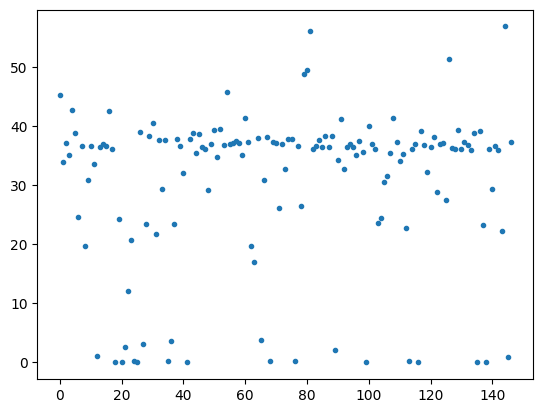

In [51]:
HunterKin3Pol=np.load('NMRDataFits/HunterKin3.npy')
corrected=HunterKin3Pol[2]*CalHunterKin3
corrected=corrected[np.where(corrected<60)]
plt.plot(corrected,'.')
np.mean(corrected)

In [55]:
CalWindmillKin3

1.6188125721784774

43.20782102862265

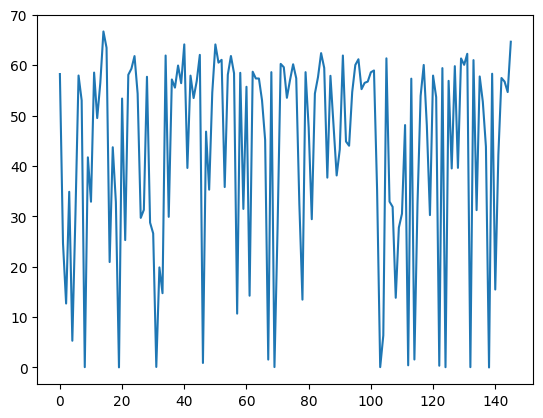

In [52]:
WindmillKin3Pol=np.load('NMRDataFits/Windmill.npy')
corrected=WindmillKin3Pol[2]*CalWindmillKin3
corrected=corrected
plt.plot(corrected)
#np.mean(corrected)

## Gordon's Analysis

    Here I attempt to reproduce Gordon's analysis carried out on 12/07/22. I will use the downstream target chamber and pumping chamber signals, but the values will come from my fits. As well as this, I will use the upstream signals.

## Hunter's Analysis

    First, I pick a reference NMR sweep for each cell in each kinematic. I use this sweep and the temperatures at the time of this sweep to correct calibrations across each kinematic.
    
    Not much improvement. Next I find the dates for the seperated data in the uncorrected histograms and look for trends.

### Hunter Kin2

    The entirety of my analysis is based on correcting the N value in in PV=NT for each sweep using RTD readouts for the target and pumping chamber. I start with each kinematic and cell by using the first calibration as the reference. I calculate N_tc and N_pc and these values are the reference values. The other calibrations are corrected accordingly.

In [ ]:
def CalculateN(cell,tcT,pcT):
    K=295
    if cell=='hunter' or cell=='Hunter':
        V_pc=306.1659*1e-6
        V_tt=44.8700*1e-6
        V_tc=160.9*1e-6
        P=6285.2
        P=837957.75
        
    Vtot=V_pc+V_tt+V_tc
    Veff=V_pc*(K/(pcT+273.15))+V_tt+V_tc*(K/(tcT+273.15))
    Pwarm=P*Vtot/Veff
  #  print(V_pc*(K/(pcT+273.15)))
   # print(Vtot)
   # print(Veff)
   # print(Pwarm)
    
    N_tc=V_tc*Pwarm/(tcT+273.15)
    N_pc=V_pc*Pwarm/(pcT+273.15)
    
    #print('Format: N_tc,N_pc')
    return(N_tc,N_pc)

# RTD Correction Hunter Kin 2

In [ ]:
kin2HunterTC=np.empty(0)
kin2HunterPC=np.empty(0)
for i,j in enumerate(newCalibrations[:20]):
    mean=np.mean([j[4][0],j[4][1],j[4][2],j[4][3]])
    kin2HunterTC=np.append(kin2HunterTC,mean)
    mean=np.mean([j[4][4],j[4][5]])
    kin2HunterPC=np.append(kin2HunterPC,mean)

rNtc, rNpc=CalculateN('hunter',kin2HunterTC[1],kin2HunterPC[1])

HK2ds=ds[:20]
HK2us=us[:20]
HK2pc=pc[:20]

allNtc=np.empty(0)
allNpc=np.empty(0)
for i in range(0,len(HK2ds)):
    ntc,npc=CalculateN('hunter',kin2HunterTC[i],kin2HunterPC[i])
    allNtc=np.append(allNtc,ntc)
    allNpc=np.append(allNpc,npc)

rtc=allNtc/rNtc
rpc=allNpc/rNpc

HK2dsNew=HK2ds*rtc
HK2usNew=HK2us*rtc
HK2pcNew=HK2pc*rpc

plt.hist(HK2pc,alpha=.5)
plt.hist(HK2pcNew,alpha=.5)

In [ ]:
print(np.std(HK2pcNew)/np.mean(HK2pcNew))
print(np.std(HK2pc)/np.mean(HK2pc))

plt.hist(HK2us,alpha=.5)
plt.hist(HK2usNew,alpha=.5)

In [ ]:
print(np.std(HK2us)/np.mean(HK2us))
print(np.std(HK2usNew)/np.mean(HK2usNew))

plt.hist(HK2ds,alpha=.5)
plt.hist(HK2dsNew,alpha=.5)

In [ ]:
print(np.std(HK2ds)/np.mean(HK2ds))
print(np.std(HK2dsNew)/np.mean(HK2dsNew))

In [ ]:
hunterKin2DS=HK2dsNew
hunterKin2US=HK2usNew
hunterKin2PC=HK2pcNew
hunterKin2Calibrations=newCalibrations[:20]
rounder=3
dsSig=np.round(np.std(hunterKin2DS)/np.mean(hunterKin2DS)*100,rounder)
usSig=np.round(np.std(hunterKin2US)/np.mean(hunterKin2US)*100,rounder)
pcSig=np.round(np.std(hunterKin2PC)/np.mean(hunterKin2PC)*100,rounder)



# Create the subplots and the histograms
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax1.hist(hunterKin2US[1:],bins=12,color='magenta',alpha=.5,label='us')
ax2.hist(hunterKin2DS[1:],bins=12,color='blue',alpha=.5,label='ds')
ax3.hist(hunterKin2PC[1:],bins=18,color='orange',alpha=.5,label='pc')

# Set the titles for the histograms
plt.suptitle('Hunter Kin2 Calibrations RTD Correction', fontsize=16,y=1.10)

ax1.set_title("Upstream")
ax2.set_title("Downstream")
ax3.set_title("Pumping Chamber")
print('DS, US, PC, std: ',dsSig,',',usSig,',',pcSig)

### Hunter Kin3

In [ ]:
kin3HunterTC=np.empty(0)
kin3HunterPC=np.empty(0)

for i,j in enumerate(newCalibrations[-10:]):
    print("Calibration: ",i)
    mean=np.mean([j[4][0],j[4][1],j[4][2],j[4][3]])
    print('TC average: ',mean)
    kin3HunterTC=np.append(kin3HunterTC,mean)
    mean=np.mean([j[4][4],j[4][5]])
    mean=j[4][4]
    print('PC average: ',mean)
    kin3HunterPC=np.append(kin3HunterPC,mean)

rNtc, rNpc=CalculateN('hunter',kin3HunterTC[3],kin3HunterPC[3])

HK3ds=ds[-10:]
HK3us=us[-10:]
HK3pc=pc[-10:]

allNtc=np.empty(0)
allNpc=np.empty(0)
for i in range(0,len(HK3ds)):
    ntc,npc=CalculateN('hunter',kin3HunterTC[i],kin3HunterPC[i])
    allNtc=np.append(allNtc,ntc)
    allNpc=np.append(allNpc,npc)

rtc=allNtc/rNtc
rpc=allNpc/rNpc

HK3dsNew=HK3ds*rtc
HK3usNew=HK3us*rtc
HK3pcNew=HK3pc*rpc

plt.hist(HK3pc,alpha=.5)
plt.hist(HK3pcNew,alpha=.5)
print(np.std(HK3pc)/np.mean(HK3pc))
print(np.std(HK3pcNew)/np.mean(HK3pcNew))


In [ ]:
plt.hist(HK3us,alpha=.5)
plt.hist(HK3usNew,alpha=.5)
print(np.std(HK3us)/np.mean(HK3us))
print(np.std(HK3usNew)/np.mean(HK3usNew))

In [ ]:
plt.hist(HK3ds,alpha=.5)
plt.hist(HK3dsNew,alpha=.5)
print(np.std(HK3ds)/np.mean(HK3ds))
print(np.std(HK3dsNew)/np.mean(HK3dsNew))

In [ ]:
plt.scatter(np.arange(0,len(kin2HunterTC),1),kin2HunterTC)
TCratio=np.empty(0)
for i in range(0,len(kin2HunterTC)):
    TCratio=np.append(TCratio,kin2HunterTC[0]/kin2HunterTC[i])

In [ ]:
plt.scatter(np.arange(0,len(kin2HunterPC),1),kin2HunterPC)
PCratio=np.empty(0)
for i in range(0,len(kin2HunterPC)):
    PCratio=np.append(PCratio,kin2HunterPC[0]/kin2HunterPC[i])

In [ ]:
plt.hist(PCratio)
plt.hist(TCratio)

In [ ]:
HK2ds=ds[:20]
HK2us=us[:20]
HK2pc=pc[:20]

HK2ds=HK2ds*TCratio
HK2us=HK2us*TCratio
HK2pc=HK2pc*PCratio

In [ ]:
ds[:20]

In [ ]:
HK2ds

In [ ]:
rounder=5
dsSig=np.round(np.std(HK2ds)/np.mean(HK2ds)*100,rounder)
usSig=np.round(np.std(HK2us)/np.mean(HK2us)*100,rounder)
pcSig=np.round(np.std(HK2pc)/np.mean(HK2pc)*100,rounder)

x1,y,z=plt.hist(HK2us,bins=12,color='magenta',alpha=.5,label='us')
x2,y,z=plt.hist(HK2ds,bins=5,color='blue',alpha=.5,label='ds')
x3,y,z=plt.hist(HK2pc,bins=18,color='orange',alpha=.5,label='pc')
plt.legend(loc='upper right')
plt.title('Hunter Kin2 Calibrations Corrected With Temperatures')
plt.xlabel('Bins (Calibration Values)')
print('DS, US, PC, std: ',dsSig,',',usSig,',',pcSig)

In [ ]:
#Reference Sweep

In [ ]:
np.where(datesInRange=='20221020_190243')

In [ ]:
newCalibrations[0]
#first Nmr of first calibration
#20221020_190243

In [ ]:
#index=indicesInRange[pick]
index=379
s=.9
oneSweep=GrabSweepAtIndex(index)
fig,axs = plt.subplots(3, 2,figsize=(10,8))
for i in range(0,3):
   
    for j in range(0,2):
        ax=axs[i][j]
        q=0
        for k in range(1,3):
            if q==0:
                word='Up'
            else:
                word='Down'
            if j ==1:
               
                j+=1
            ax.plot(oneSweep[i][0],oneSweep[i][k+j]/s)
            h,params=FitLorentzian(i,k+j,oneSweep,0)
            ax.plot(oneSweep[i][0], Lorentzian(oneSweep[i][0], *params)/s, label=word+' '+ str(np.round(h/s,4))+'mV')
            q=1
            
            
     
    
axs[0][0].set_title('DownStream X Channel')
axs[0][1].set_title('DownStream Y Channel')
axs[1][0].set_title('UpStream X Channel')
axs[1][1].set_title('UpStream Y Channel')
axs[2][0].set_title('Pumping Chamber X Channel')
axs[2][1].set_title('Pumping Chamber Y Channel')
            
for ax in axs.flat:
    ax.legend(fontsize=9)
    ax.grid()

# Show the figure
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Sweep "+ datesInRange[index],fontsize=20)
plt.show()